베르누이분포와 이항분포

베르누이분포와 이항분포는 가장 단순한 분포지만 분류문제에서 널리 사용된다.


- 베르누이 시행
  - 결과가 두 가지 중 하나로만 나오는 시행. 동전을 던져 앞면/뒷면이 나오게 하는 것.
- 베르누이 확률변수
  - 베르누이 시행 결과를 실수 0 또는 1로 바꾼 것. 모수로 $\mu$를 갖는다. 1이 나올 확률 = $\mu$
- 베르누이 확률분포
  - 베르누이 확률변수의 분포. 모수로 $\mu$를 갖는다. 1이 나올 확률 = $\mu$
  - $X$ ~ $Bern(x; \mu)$
---

In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   # FutureWarning 제거

import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

font_family = 'Malgun Gothic'

sns.set(font=font_family, rc={'axes.unicode_minus' : False})

In [2]:
mu = 0.6
rv = stats.bernoulli(mu)

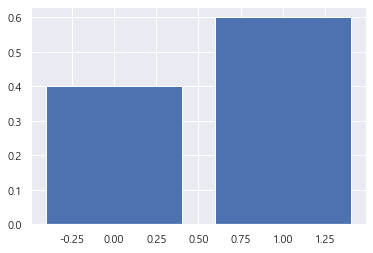

In [5]:
xx = [0, 1]
pmf = rv.pmf(xx)
plt.bar(xx, pmf)
plt.show()

In [6]:
# 무작위 표본 100개 생성
x = rv.rvs(100, random_state=12)
x

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

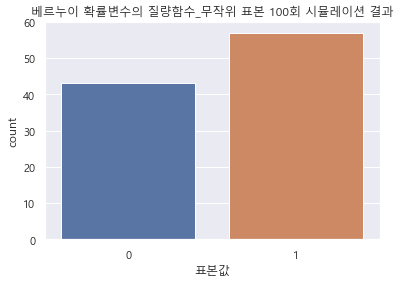

In [15]:
# 집계도   ( countplot )
sns.countplot(x)
plt.title('베르누이 확률변수의 질량함수_무작위 표본 100회 시뮬레이션 결과')
plt.xlabel('표본값')
plt.ylim(0, 60)
plt.show()

In [21]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({'이론':pmf, '시뮬레이션':y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.43
1,0.6,0.57


In [19]:
np.bincount(x, minlength=2)

array([43, 57], dtype=int64)

In [20]:
df2 = df.stack().reset_index()
df2.columns = ['표본값', '유형', '비율']
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.43
2,1,이론,0.60
3,1,시뮬레이션,0.57


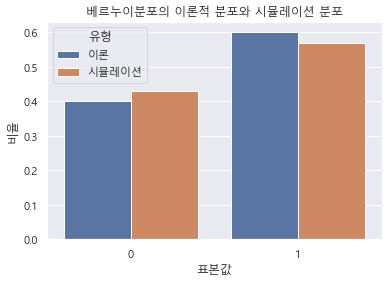

In [23]:
sns.barplot(x='표본값', y='비율', hue='유형', data=df2)
plt.title('베르누이분포의 이론적 분포와 시뮬레이션 분포')
plt.show()

In [24]:
# 연습문제
# 베르누이 확률분포의 모수가 다음과 같을 경우 각각 표본을 생성한 후
# 기댓값과 분산을 구하고 확률밀도함수와 비교한 바 플롯을 그려라.
# 표본 개수 10개와 1000개인 경우 각각 계산할 것.

mu1 = 0.5
mu2 = 0.9

rv1 = stats.bernoulli(mu1)
rv2 = stats.bernoulli(mu2)

xx = [0, 1]

pmf1 = rv1.pmf(xx)
pmf2 = rv2.pmf(xx)



In [25]:
rvs1 = rv1.rvs(size=10, random_state=42)
rvs2 = rv2.rvs(size=10, random_state=42)

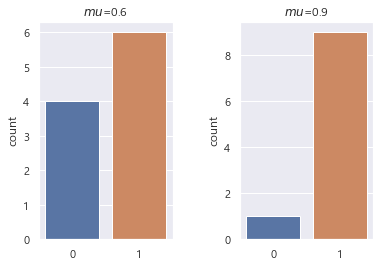

In [36]:
plt.subplot(1, 2, 1)
sns.countplot(rvs1)
plt.title('$mu$=0.6')

plt.subplot(1, 2, 2)
sns.countplot(rvs2)
plt.title('$mu$=0.9')
plt.subplots_adjust(hspace=3, wspace=0.5)
plt.show()

In [37]:
rvs1_1000 = rv1.rvs(size=1000, random_state=42)
rvs2_1000 = rv2.rvs(size=1000, random_state=42)

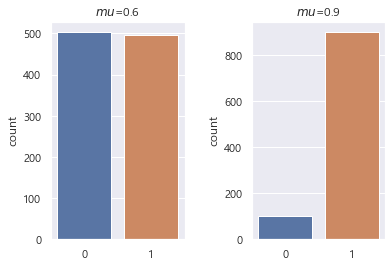

In [38]:
plt.subplot(1, 2, 1)
sns.countplot(rvs1_1000)
plt.title('$mu$=0.6')

plt.subplot(1, 2, 2)
sns.countplot(rvs2_1000)
plt.title('$mu$=0.9')
plt.subplots_adjust(hspace=3, wspace=0.5)
plt.show()

In [45]:
# 기댓값 구하기
print(f'rvs1의 기댓값 : {rvs1.mean()}')
print(f'rvs2의 기댓값 : {rvs2.mean()}')
print(f'rvs1_1000의 기댓값 : {rvs1_1000.mean()}')
print(f'rvs2_1000의 기댓값 : {rvs2_1000.mean()}')

rvs1의 기댓값 : 0.6
rvs2의 기댓값 : 0.9
rvs1_1000의 기댓값 : 0.497
rvs2_1000의 기댓값 : 0.9


In [44]:
# 분산 구하기
print(f'rvs1의 분산 : {rvs1.var()}')
print(f'rvs2의 분산 : {rvs2.var()}')
print(f'rvs1_1000의 분산 : {rvs1_1000.var()}')
print(f'rvs2_1000의 분산 : {rvs2_1000.var()}')

rvs1의 분산 : 0.24000000000000005
rvs2의 분산 : 0.09000000000000001
rvs1_1000의 분산 : 0.24999099999999994
rvs2_1000의 분산 : 0.09


In [48]:
# stats.describe 명령으로 구하기
stats.describe(rvs1)

DescribeResult(nobs=10, minmax=(0, 1), mean=0.6, variance=0.2666666666666667, skewness=-0.40824829046386274, kurtosis=-1.8333333333333335)

In [50]:
pd.Series(stats.describe(rvs1), index=['표본 사이즈', '최소최대값', '기댓값', '분산', '왜도', '첨도'])

표본 사이즈          10
최소최대값       (0, 1)
기댓값            0.6
분산        0.266667
왜도       -0.408248
첨도       -1.833333
dtype: object

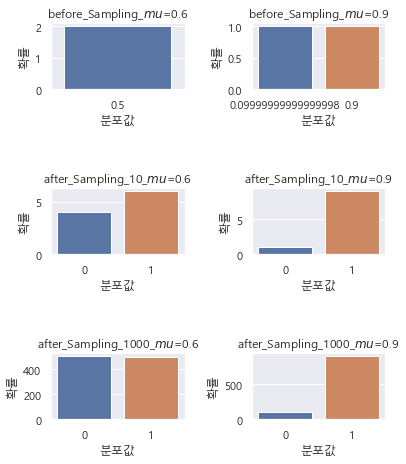

In [63]:
# 비교 시각화
plt.subplot(3, 2, 1)
sns.countplot(pmf1)
plt.title('before_Sampling_$mu$=0.6')
plt.ylabel('확률')
plt.xlabel('분포값')

plt.subplot(3, 2, 2)
sns.countplot(pmf2)
plt.title('before_Sampling_$mu$=0.9')
plt.ylabel('확률')
plt.xlabel('분포값')

plt.subplot(3, 2, 3)
sns.countplot(rvs1)
plt.title('after_Sampling_10_$mu$=0.6')
plt.ylabel('확률')
plt.xlabel('분포값')

plt.subplot(3, 2, 4)
sns.countplot(rvs2)
plt.title('after_Sampling_10_$mu$=0.9')
plt.ylabel('확률')
plt.xlabel('분포값')

plt.subplot(3, 2, 5)
sns.countplot(rvs1_1000)
plt.title('after_Sampling_1000_$mu$=0.6')
plt.ylabel('확률')
plt.xlabel('분포값')

plt.subplot(3, 2, 6)
sns.countplot(rvs2_1000)
plt.title('after_Sampling_1000_$mu$=0.9')
plt.ylabel('확률')
plt.xlabel('분포값')

plt.subplots_adjust(wspace=0.5, hspace=1.5, top=1.5)
plt.show()

- 이항분포
  - 베르누이 시행을 N번 반복하여, N번 중 성공할 확률의 분포

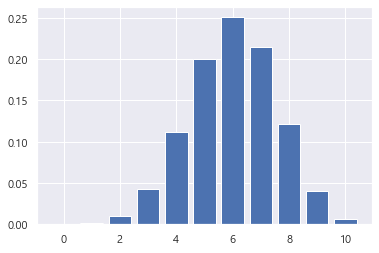

In [64]:
N = 10   # 시행횟수
mu = 0.6  # 기댓값
rv = stats.binom(N, mu)
xx = np.arange(N + 1)
pmf = rv.pmf(xx)

plt.bar(xx, pmf, align='center')
plt.show()

In [77]:
print(f'pmf의 기댓값 : {np.mean(pmf)}')

pmf의 기댓값 : 0.09090909090909086


In [70]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

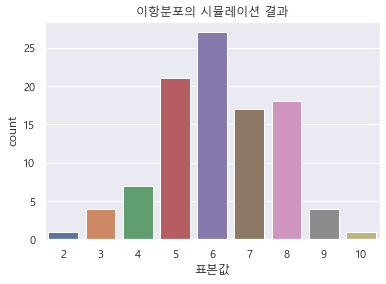

In [71]:
sns.countplot(x)
plt.title('이항분포의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.show()

In [72]:
y = np.bincount(x, minlength=N+1) / float(len(x))  # 비율 계산
df = pd.DataFrame({'이론': pmf, '시뮬레이션': y}).stack()
df = df.reset_index()
df.columns = ['표본값', '유형', '비율']
df.pivot('표본값', '유형', '비율')
df

,표본값,유형,비율
0,0,이론,0.000105
1,0,시뮬레이션,0.000000
2,1,이론,0.001573
3,1,시뮬레이션,0.000000
4,2,이론,0.010617
5,2,시뮬레이션,0.010000
6,3,이론,0.042467
7,3,시뮬레이션,0.040000
8,4,이론,0.111477
9,4,시뮬레이션,0.070000


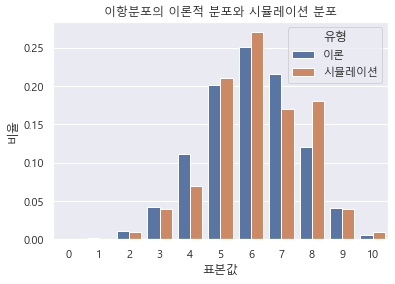

In [78]:
sns.barplot(x='표본값', y='비율', hue='유형', data=df)
plt.title('이항분포의 이론적 분포와 시뮬레이션 분포')
plt.show()

- 이항분포의 기댓값은 $N\mu$이다.
- ( 시행횟수 * 모집단의 기댓값 )

In [80]:
N1 = 5
N2 = 20
mu1 = 0.5
mu2 = 0.9
rv1 = stats.binom(N1, mu1)
rv2 = stats.binom(N2, mu2)
x1 = np.arange(N1 + 1)
x2 = np.arange(N2 + 1)

pmf1 = rv1.pmf(x1)
pmf2 = rv2.pmf(x2)

rvs1_10 = rv1.rvs(size=10, random_state=8)
rvs2_10 = rv2.rvs(size=10, random_state=8)
rvs1_1000 = rv1.rvs(size=1000, random_state=8)
rvs2_1000 = rv2.rvs(size=1000, random_state=8)

<AxesSubplot:ylabel='count'>

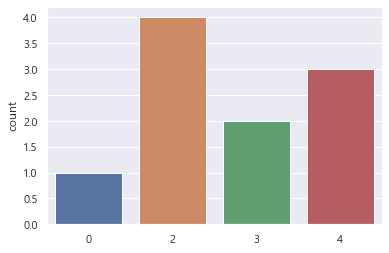

In [81]:
sns.countplot(rvs1_10)

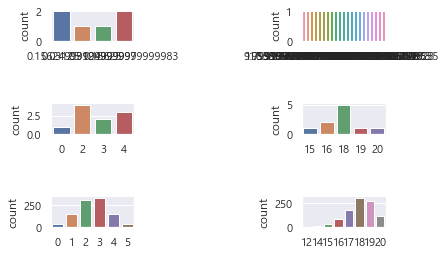

In [84]:
plt.subplot(3, 2, 1)
sns.countplot(pmf1)

plt.subplot(3, 2, 2)
sns.countplot(pmf2)

plt.subplot(3, 2, 3)
sns.countplot(rvs1_10)

plt.subplot(3, 2, 4)
sns.countplot(rvs2_10)

plt.subplot(3, 2, 5)
sns.countplot(rvs1_1000)

plt.subplot(3, 2, 6)
sns.countplot(rvs2_1000)

plt.subplots_adjust(wspace=2, hspace=2)
plt.show()


## countplot은 사이즈가 많아질수록 그림이 망가진다..

In [111]:
cdf1 = rv1.cdf(x1)
cdf2 = rv2.cdf(x2)

In [119]:
print(f'rv1의 기댓값 = 0.6, 시행횟수 = 5')
print(f'rv1의 누적분포함수 : {cdf1.mean()}')
print(f'rv2의 기댓값 = 0.9, 시행횟수 = 20')
print(f'rv2의 누적분포함수 : {cdf2.mean()}')

rv1의 기댓값 = 0.6, 시행횟수 = 5
rv1의 누적분포함수 : 0.5833333333333334
rv2의 기댓값 = 0.9, 시행횟수 = 20
rv2의 누적분포함수 : 0.14285714285714285
